# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-1**<br>
**Profesora:** Paula Aguirre <br>

## Clases 6: Extracción de Datos desde la Web

---


## 1. Introducción.

Las organizaciones (y el mundo) generan y almacenan datos a través de distintos métodos y herramientas de software, cada uno con sus propios formatos y ubicaciones. El proceso ETL (o a veces, ELT) se refiere al desarrollo de pipelinas para la integración, estructuración y almacenamiento de datos provenientes de múltiples fuentes. 

La primera etapa de **extracción**, implica identificar las fuentes de datos requeridas (software, IoT, data de clientes, RRSS, web analytics, etc) y el formato de dichos datos, y luego obtener en forma automatizada los datos desde la fuente original, hacia un repositorio temporal donde se realizan la  **transformación**. Esta etapa se refiere a la conversión de la data en un formato y estructura apropiada para el análisis y modelamiento.


## 2. Extracción de Datos.

Los datos de interés para un problema de ciencia de datos pueden estar ubicados en diversas fuentes: archivos en almacenamiento local o remoto, servidores de bases de datos, y la web. 

En la web, la transmisión de información se realiza mediante el protocolo HTTP (Hypertext Transfer Protocol), diseñado para la comunicación entre los navegadores y servidores web. Sigue el clásico modelo cliente-servidor, en el que un cliente establece una conexión, realizando una petición a un servidor y espera una respuesta del mismo.

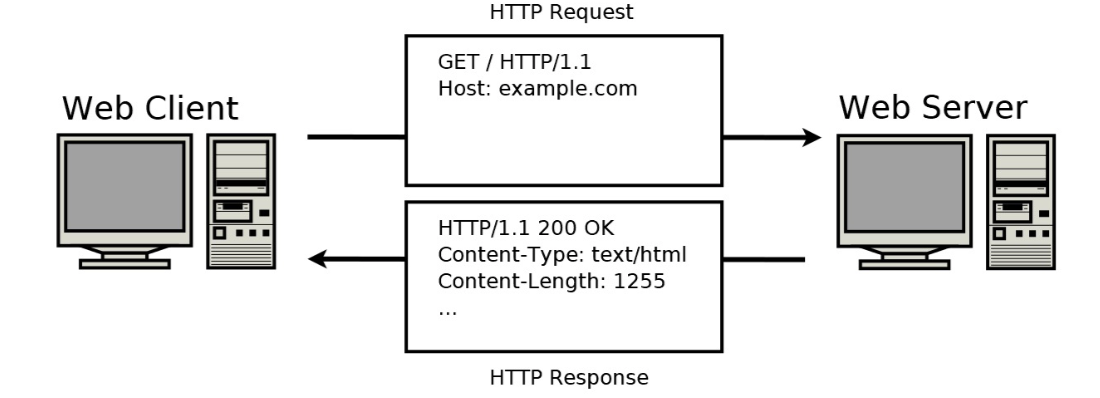


HTTP define un conjunto de métodos de petición para indicar la acción que se desea realizar para un recurso determinado. Los métodos más comunes son GET y POST:

- `GET`: el método GET  solicita una representación de un recurso específico. Las peticiones que usan el método GET sólo deben recuperar datos.
- `POST`: el método POST se utiliza para enviar una entidad a un recurso en específico, causando a menudo un cambio en el estado o efectos secundarios en el servidor.

En este ejercicio, exploraremos distintas formas de extraer datos desde la WWW, utilizando la librería `requests` para enviar peticiones HTTP a un servidor (Ej. GET, POST), y recoger la respuesta en un objeto tipo `Response`, que implementa métodos y atributos para leer y explorar los datos extraídos. 

La documentación se encuentra en el siguiente link:

https://docs.python-requests.org/en/latest/api/#requests.Response

Siempre que se hace un llamado a `requests.get()`, está ocurriendo dos cosas importantes. Primero, se está construyendo un objeto tipo `Request`, el cual será enviado a un servidor con el fin de obtener información de éste. Segundo, un objeto `Response` es generado una vez que requests obtenga una respuesta del servidor. El objeto respuesta contiene toda la información entregada por el servidor, así como el objecto `Request` que fue creado originalmente.




### 2.1 URL

Frecuentemente, los datos que necesitamos para aplicar nuestros conocimientos de ciencia de datos están publicados en alguna dirección web or URL (Universal Resource Locator). Podemos descargarlos fácilmente navegando hacia dicha URL y haciendo click en un link, pero esto supone limitaciones de reproducibilidad y escalabilidad (por ejemplo, si queremos descargar muchos archivos).
 
Para automatizar el proceso, podemos utilizar códigos de Python para importar y guardar localmente datasets de la WWW, y convertirlos en DataFrames de pandas, usando la librería  `requests`. También es posible usar `pandas` directamente para leer algunos tipos de archivos mediante su URL.


### Ejemplo 1: Leer contenido de un archivo directamente desde su URL usando `pandas`.

In [1]:
import pandas as pd

#url del archivo
url = 'https://datos.gob.cl/dataset/c2969d8a-df82-4a6c-a1f8-e5eba36af6cf/resource/cbd329c6-9fe6-4dc1-91e3-a99689fd0254/download/pcma_20210901_oficio-4770_2013.xlsx'

#leer datos y crear un dataframe. Si se trata de un archivo en formato csv, usar pd.read_csv (o la función correspondiente al formato del archivo)
dat=pd.read_excel(url,skiprows=9)
dat.head(12)


,CODIGO,ENTIDAD,NOMBRE FANTASIA,DIRECCION,COMUNA,HORARIO REFERENCIAL,ESTE,NORTE,LONGITUD,LATITUD
0,424,Fullcarga,EL RINCON DEL GUSTO,CERRO BLANCO 625,MAIPU,NaN,334307,6288070,-70.784993,-33.534428
1,954,Fullcarga,LUIS ARAYA CARVAJAL,TAMARUGOS 3554,RENCA,NaN,342184,6304138,-70.696795,-33.390350
2,1224,Fullcarga,MARION,LOS DURAZNOS 356 A,ESTACION CENTRAL,NaN,341056,6295687,-70.710417,-33.466487
3,3316,Fullcarga,NISSY,JOAQUIN EDWARDS BELLO 10999,LA PINTANA,NaN,349448,6285070,-70.622688,-33.563602
4,9878,Fullcarga,ERICHOPER,LOS RETAMOS 5615,HUECHURABA,NaN,349062,6305684,-70.623182,-33.377799
5,10347,Fullcarga,DON ORLANDO,ARTURO PRAT 5725 DPTO 11,RENCA,NaN,338912,6302602,-70.732990,-33.404000
6,10489,Fullcarga,NOLBERTO VALDES NAVARRO,CALLE 462 5994,PEÑALOLEN,NaN,354320,6291989,-70.568331,-33.501720
7,10767,Fullcarga,BAZAR LA KUKA,AV. RECOLETA 4021,RECOLETA,NaN,347250,6304432,-70.642299,-33.388429
8,11267,Fullcarga,DAVICITO,LOS PLATANOS 1214,CERRO NAVIA,NaN,338922,6299319,-70.732721,-33.433431
9,11377,Fullcarga,ELSA ROSA REYES YANEZ,EL PILLAN 10858,LA PINTANA,NaN,349862,6285409,-70.617412,-33.560429


### Ejemplo 2: Descargar un archivo directamente desde su URL usando `requests`.

In [2]:
#lo mismo que hicimos antes, pero ahora usando Requests para solicitar el recurso y guardarlo en el disco local
import requests

url = 'https://datos.gob.cl/dataset/c2969d8a-df82-4a6c-a1f8-e5eba36af6cf/resource/cbd329c6-9fe6-4dc1-91e3-a99689fd0254/download/pcma_20210901_oficio-4770_2013.xlsx'
r= requests.get(url,stream=False)


In [3]:
#la respuesta a la solicitud queda almacenada en un objeto tipo Response
r

<Response [200]>

In [4]:
#el atributo r.content tiene el contenido del archivo
r.content

b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfr\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [5]:
#escribimos el contenido del objeto reponse en un archivo local en su computador
open('puntosBip.xlsx', 'wb').write(r.content)

#leemos el archivo local usando pandas
df=pd.read_excel('puntosBip.xlsx',engine='openpyxl',skiprows=9)
df

,CODIGO,ENTIDAD,NOMBRE FANTASIA,DIRECCION,COMUNA,HORARIO REFERENCIAL,ESTE,NORTE,LONGITUD,LATITUD
0,424,Fullcarga,EL RINCON DEL GUSTO,CERRO BLANCO 625,MAIPU,NaN,334307,6288070,-70.784993,-33.534428
1,954,Fullcarga,LUIS ARAYA CARVAJAL,TAMARUGOS 3554,RENCA,NaN,342184,6304138,-70.696795,-33.390350
2,1224,Fullcarga,MARION,LOS DURAZNOS 356 A,ESTACION CENTRAL,NaN,341056,6295687,-70.710417,-33.466487
3,3316,Fullcarga,NISSY,JOAQUIN EDWARDS BELLO 10999,LA PINTANA,NaN,349448,6285070,-70.622688,-33.563602
4,9878,Fullcarga,ERICHOPER,LOS RETAMOS 5615,HUECHURABA,NaN,349062,6305684,-70.623182,-33.377799
...,...,...,...,...,...,...,...,...,...,...
1635,120167,Fullcarga,LA FAMILIA,ALTAR DE LA PATRIA 2338,MAIPU,NaN,333854,6291692,-70.789200,-33.501701
1636,120173,Fullcarga,MINIMARKET CRISTOPHER 2,AV. EINSTEIN 0206,RECOLETA,NaN,348318,6302548,-70.631714,-33.405975
1637,120185,Fullcarga,EL CHICO PEDRO,AV. DIAGONAL RENY 1697,CERRO NAVIA,NaN,336688,6301049,-70.757004,-33.417778
1638,120204,Fullcarga,HECTOR PATRICIO ORELLANA HINOJOSA,JUAN FRANCISCO RIVAS 9554,EL BOSQUE,NaN,344408,6287157,-70.675841,-33.543891


En general puede ser más útil usar requests para descargar datos en formatos que no son leíbles directamente con `pandas`.

Por ejemplo, los microdatos del censo están publicados como un archivo binario comprimido (.zip). Por lo tanto, lo descargamos usando `requests`, y luego lo abrimos como un objeto tipo byte usando la librería `io`.

Finalmente, descomprimimos usando `zipfile`: https://docs.python.org/es/3.10/library/zipfile.html#zipfile-objects

In [ ]:
import io, zipfile
#puede ser más útil usar requests para descargar datos en formatos que no son leíbles directamente con pandas
#Por ejemplo, los microdatos del censo están publicados en formato comprimido .zip

url ='http://www.censo2017.cl/descargas/microdatos/Censo2017_ManzanaEntidad_CSV.zip'

r = requests.get(url, stream=True)


#Este dataset corresponde a un archivo binario comprimido, por lo tanto lo abrimos como un objeto tipo byte usando la librería io
#Luego descomprimimos usando zipfile: https://docs.python.org/es/3.10/library/zipfile.html#zipfile-objects

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()



In [ ]:
!ls Censo2017_16R_ManzanaEntidad_CSV

In [ ]:
dat_manz=pd.read_csv('Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Manzanas.csv',delimiter=';')
print(dat_manz.head())

In [4]:
import requests

url='http://www.omdbapi.com/?t=adventure&y=1945'
r = requests.get(url)


In [5]:
data=r.json()

In [6]:
data

{'Response': 'False', 'Error': 'No API key provided.'}